In [3]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 3.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('fake.csv')

# Example: ANOVA for spam_score by news_type
group_0 = data[data['news_type'] == 0]['spam_score']
group_1 = data[data['news_type'] == 1]['spam_score']

# Perform ANOVA
anova_result = f_oneway(group_0, group_1)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("Significant difference found between the groups.")
else:
    print("No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='news_type', y='spam_score', data=data)
plt.title('Spam Score Distribution by News Type')
plt.xlabel('News Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Spam Score')
plt.show()


KeyError: 'news_type'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('fake.csv')

# 1. Statistical Summaries
print("Basic Information:")
print(data.info())  # Dataset info
print("\nSummary Statistics:")
print(data.describe())  # Statistical summary for numerical columns
print("\nMissing Values:")
print(data.isnull().sum())  # Count missing values in each column



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null

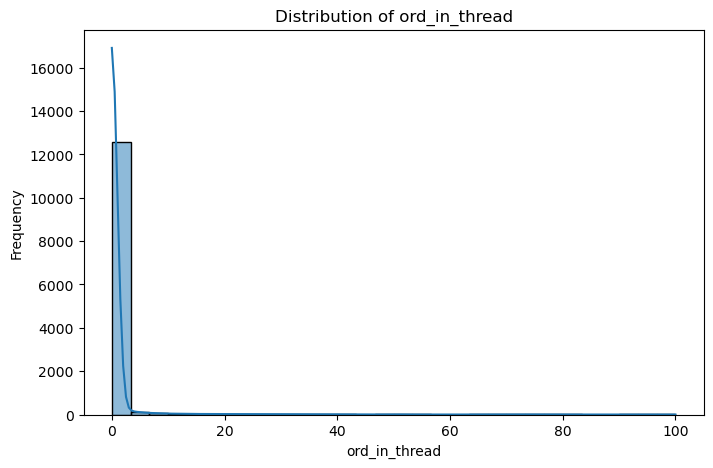

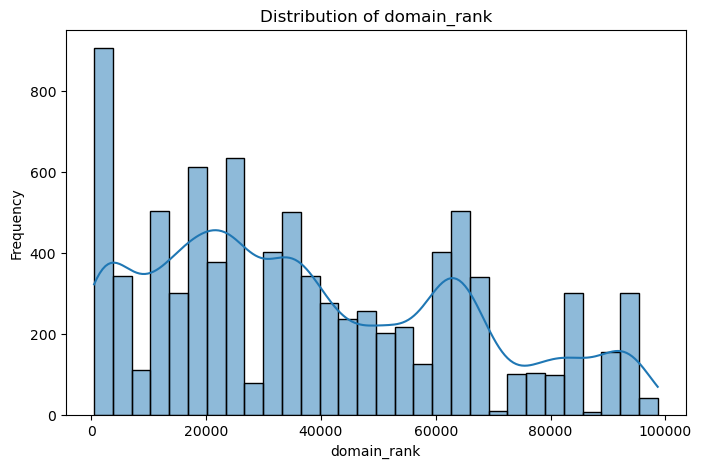

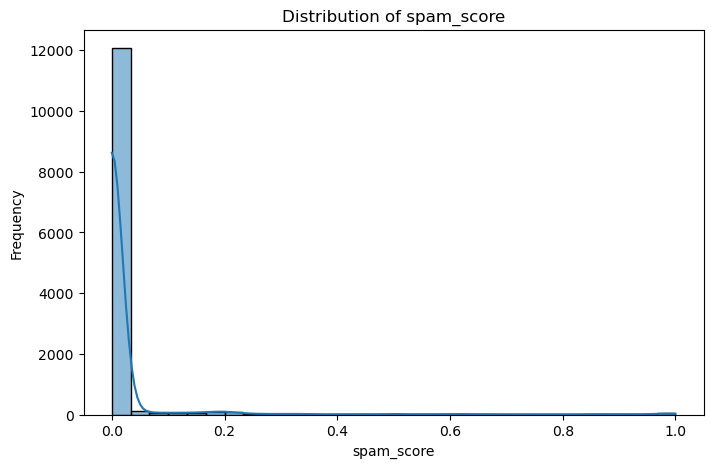

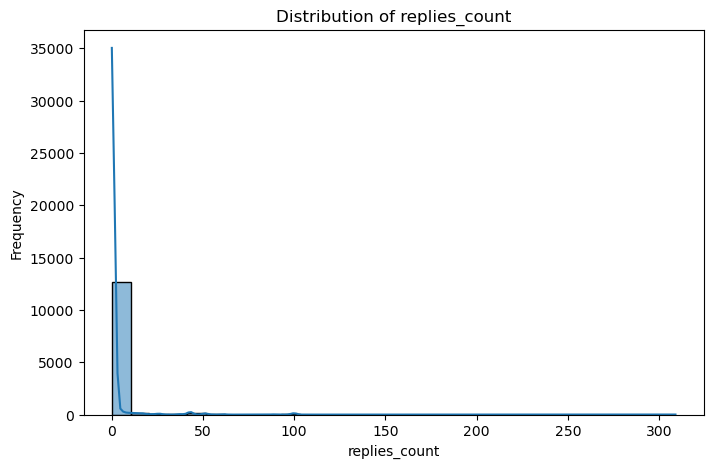

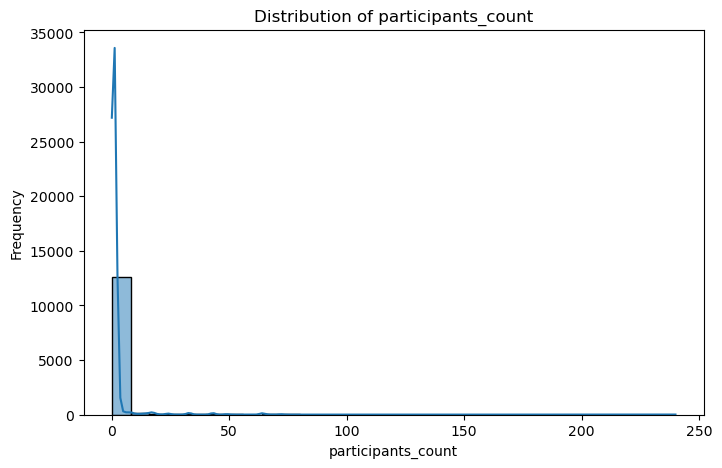

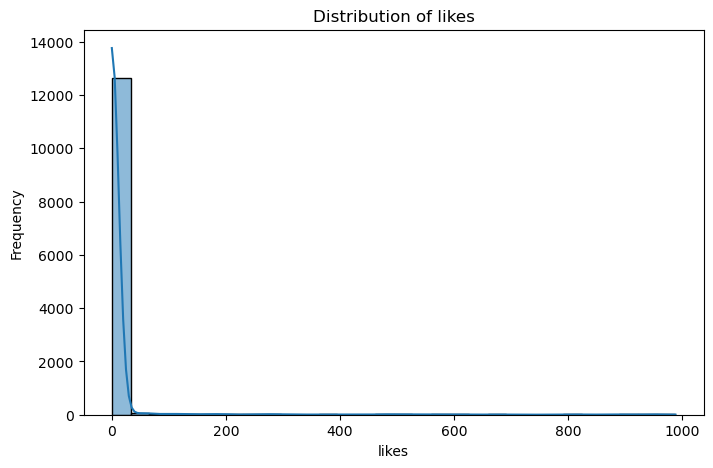

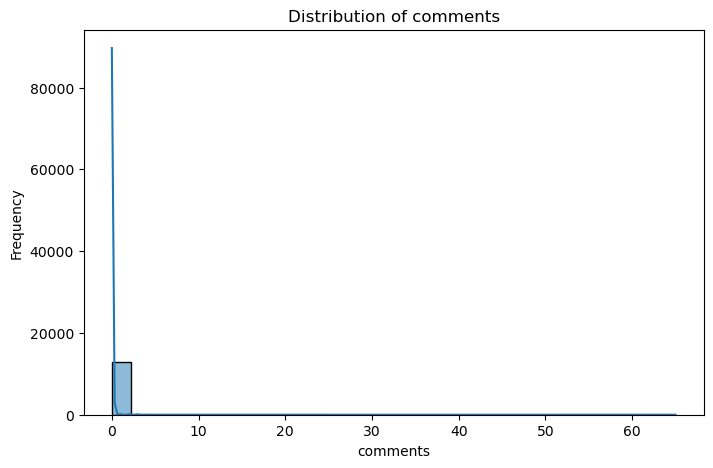

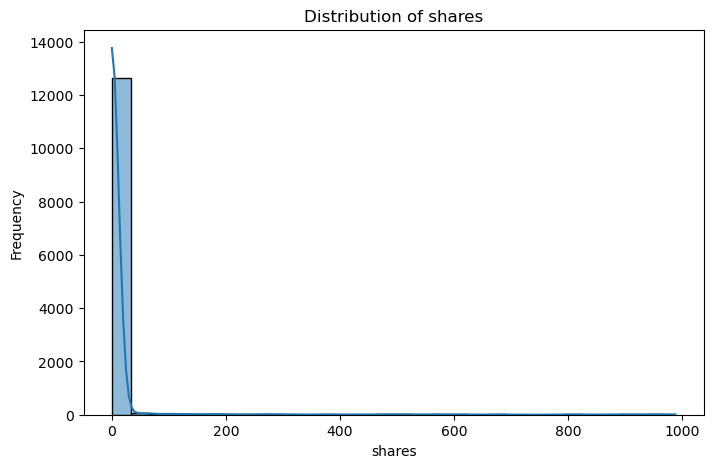

In [5]:
# 2. Distribution of Numerical Features
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



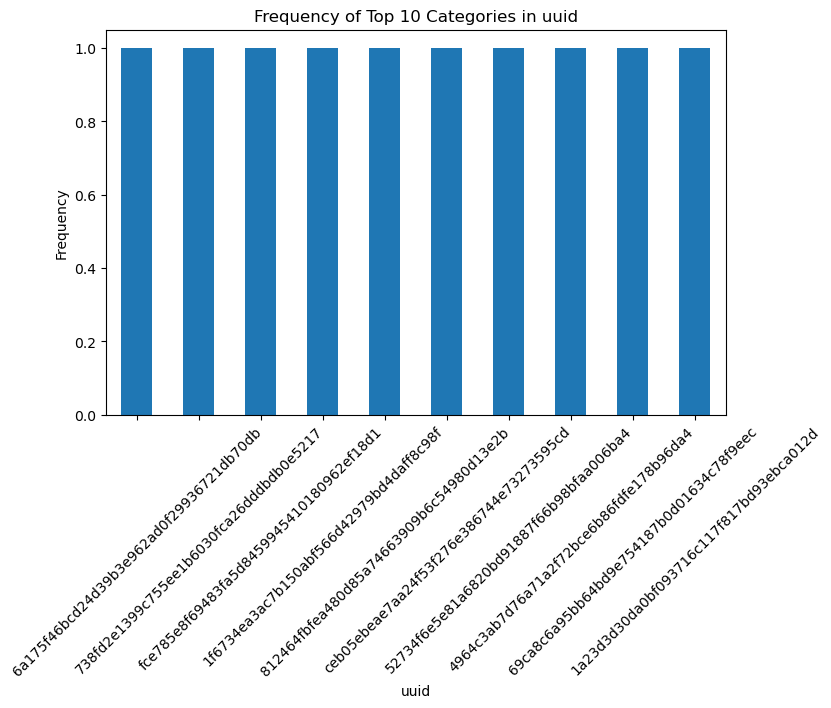

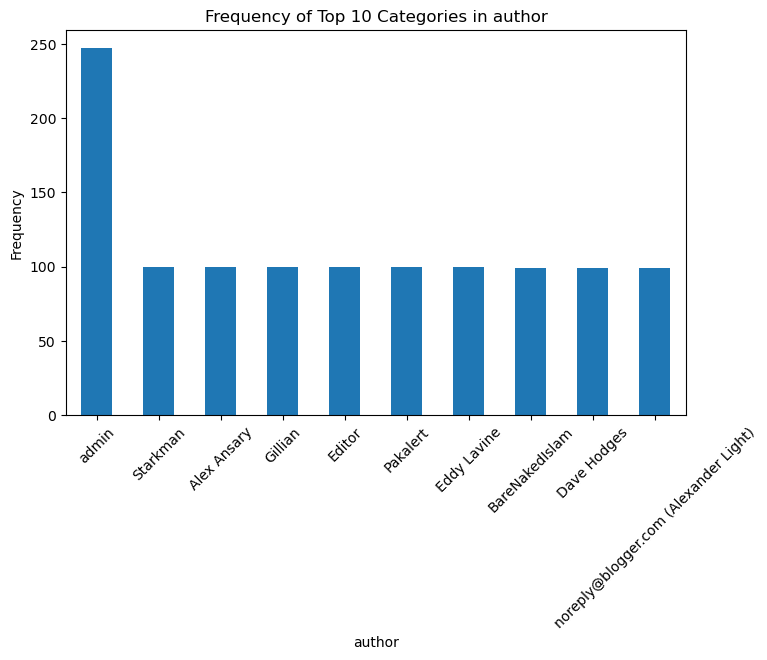

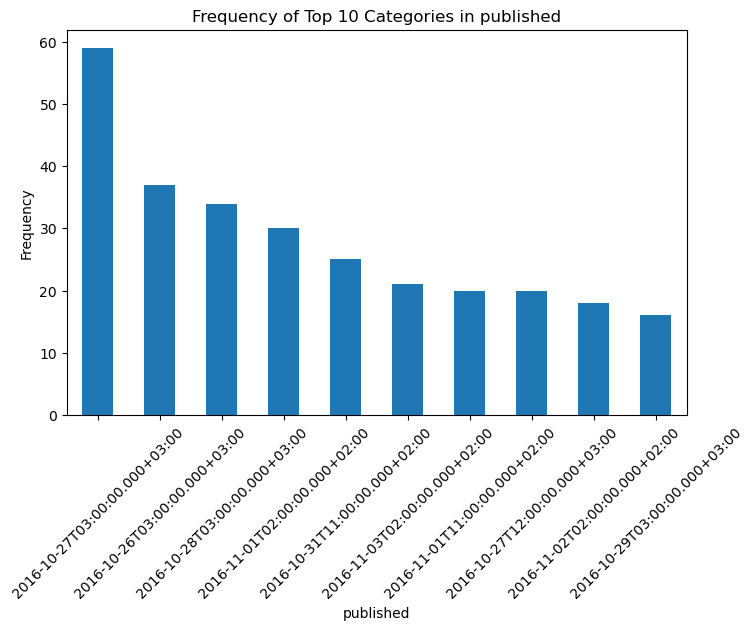

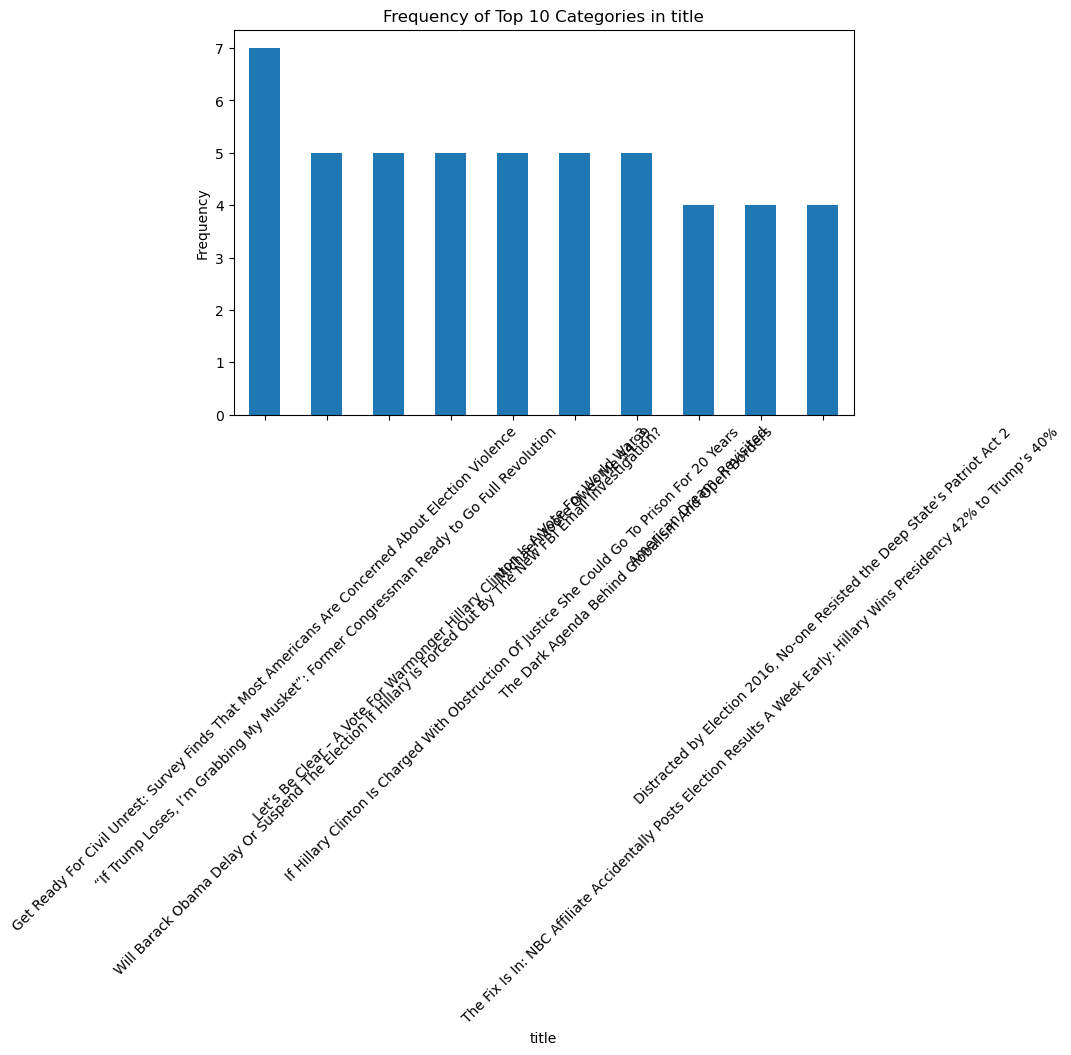

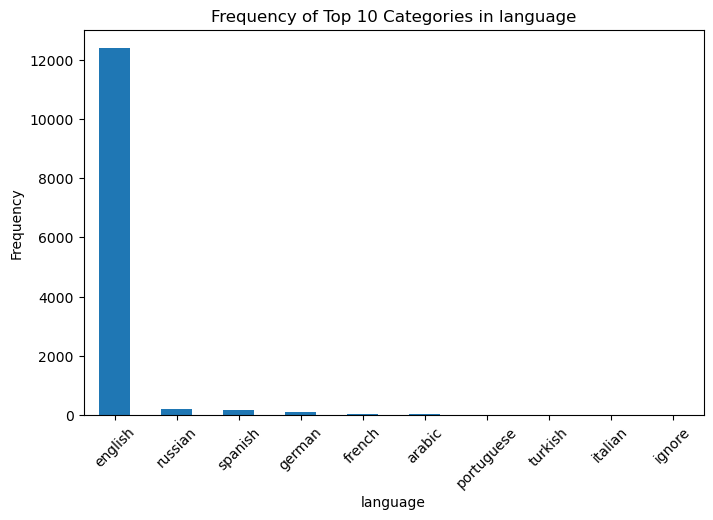

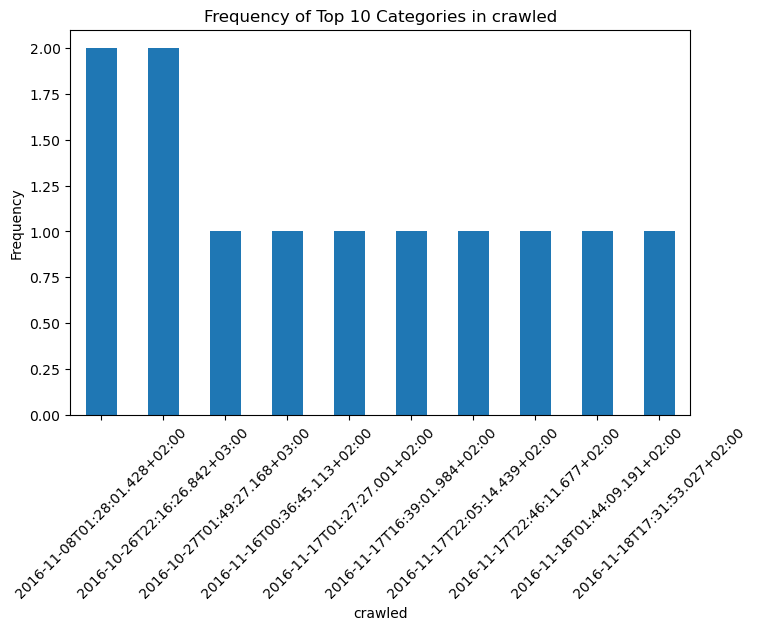

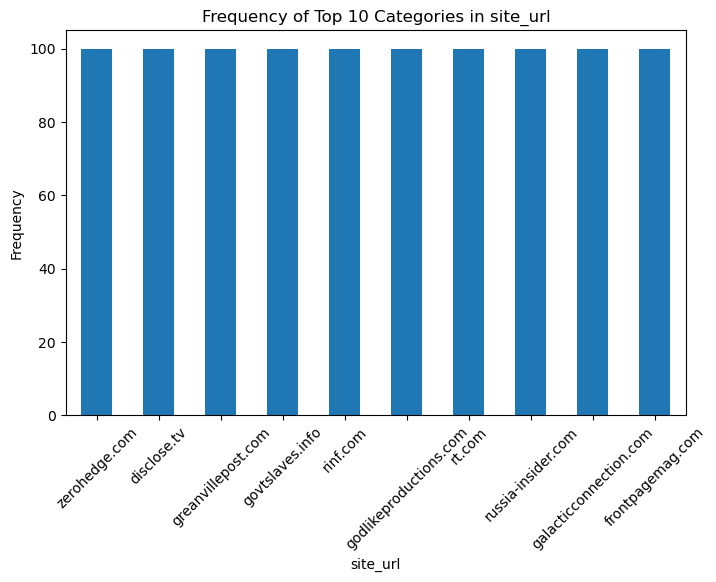

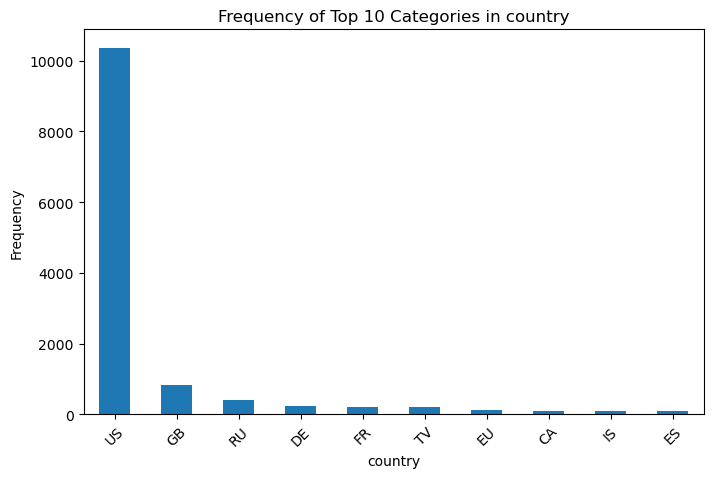

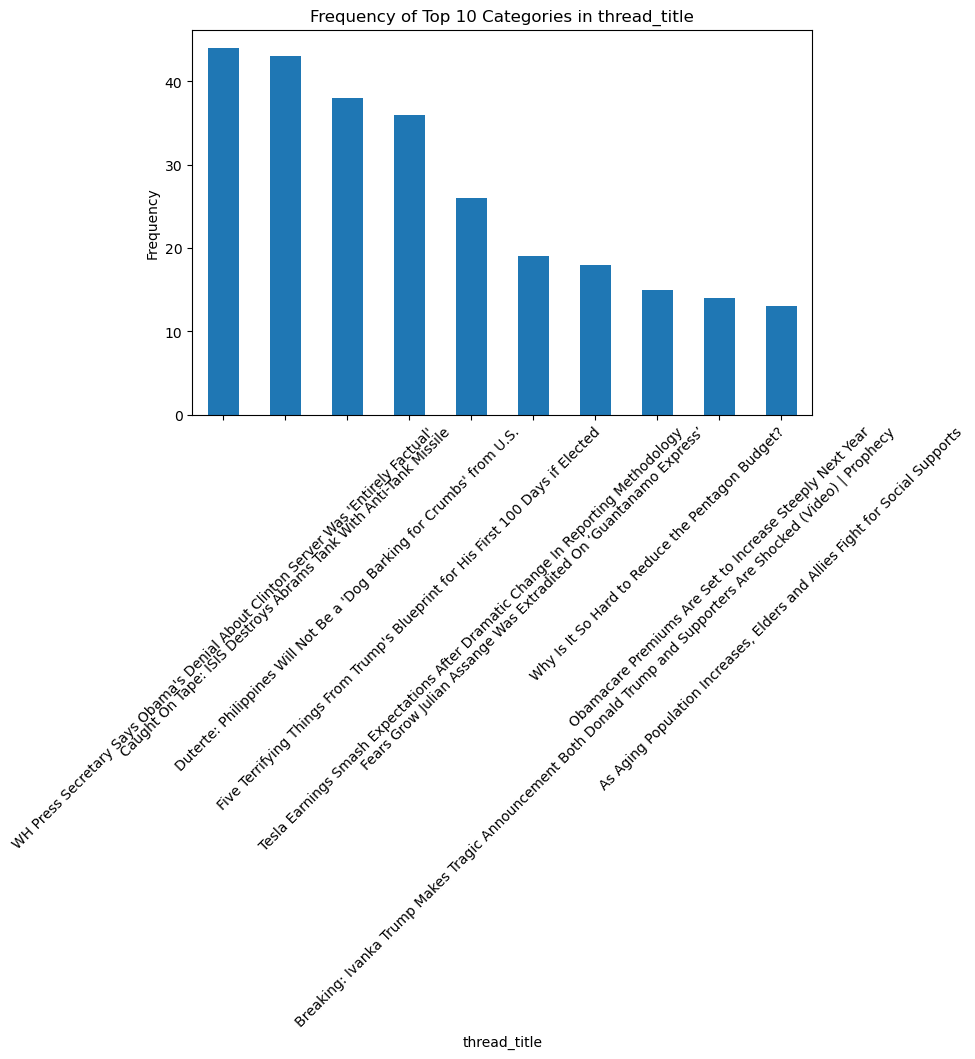

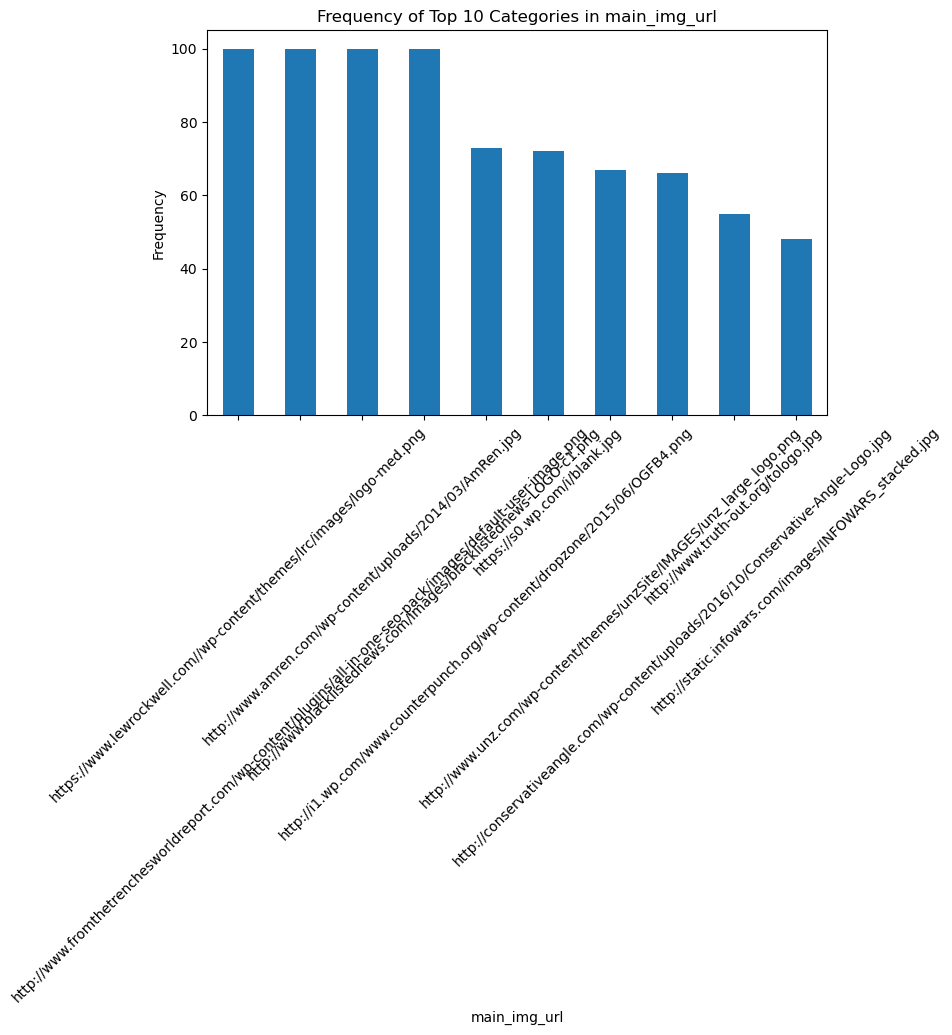

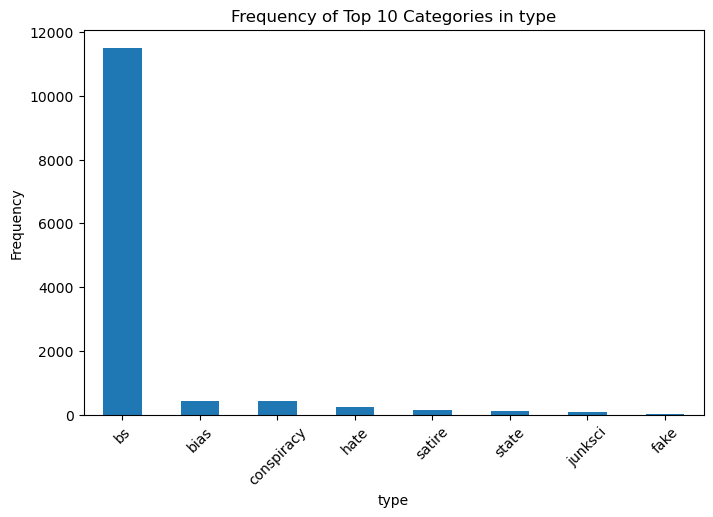

In [6]:
# 3. Distribution of Categorical Features
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Frequency of Top 10 Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


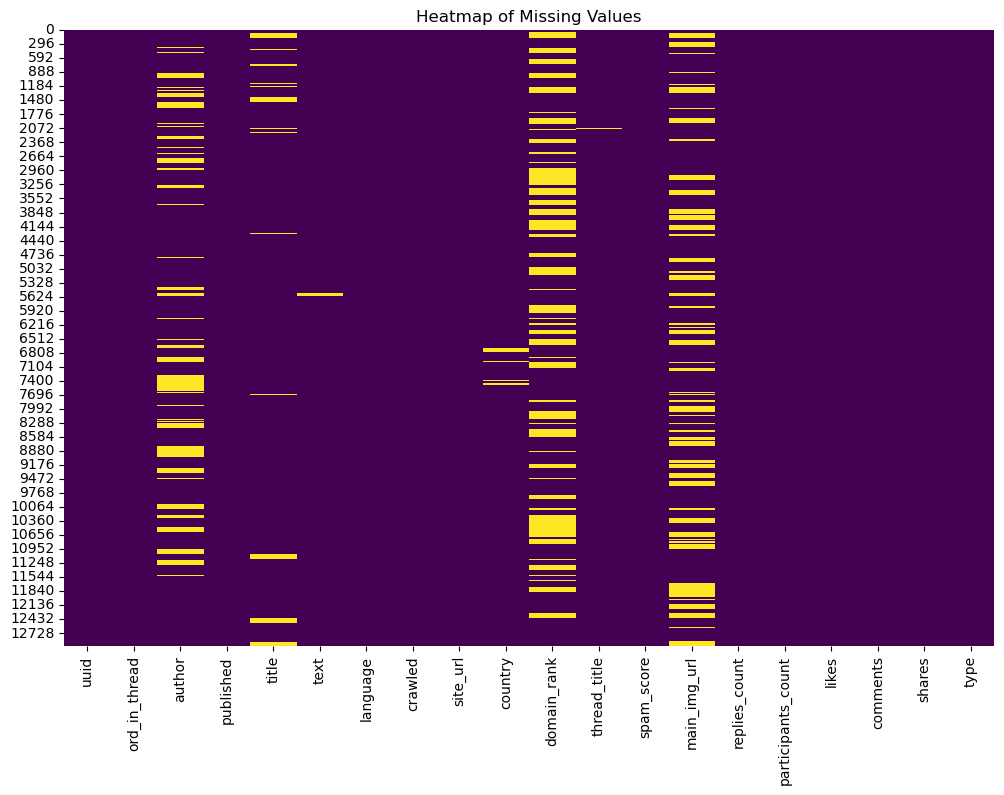

In [7]:

# 4. Missing Values Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()



/var/folders/gl/bj_c88ds0glf07y3mgkkvmv40000gn/T/ipykernel_45497/4189386751.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


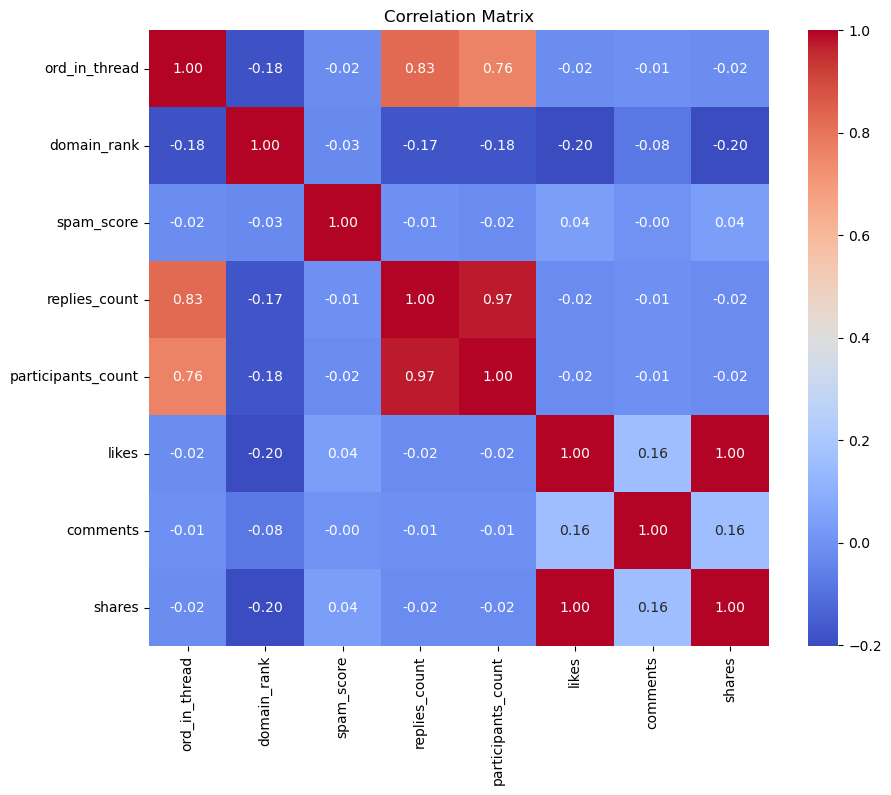

In [8]:
# 5. Correlation Analysis (Numerical Features)
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



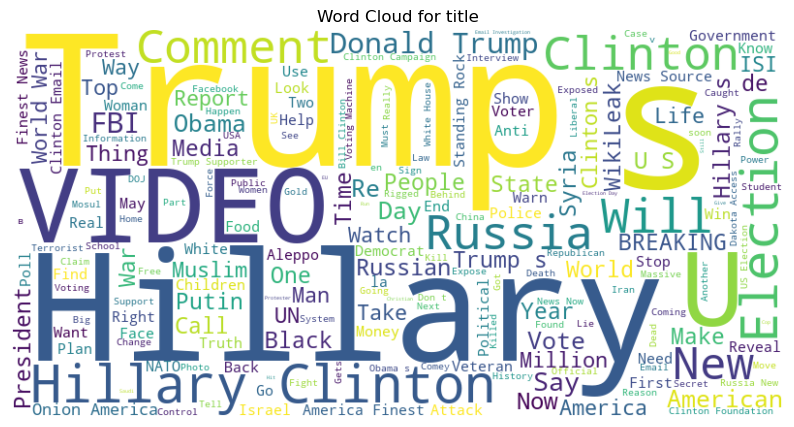

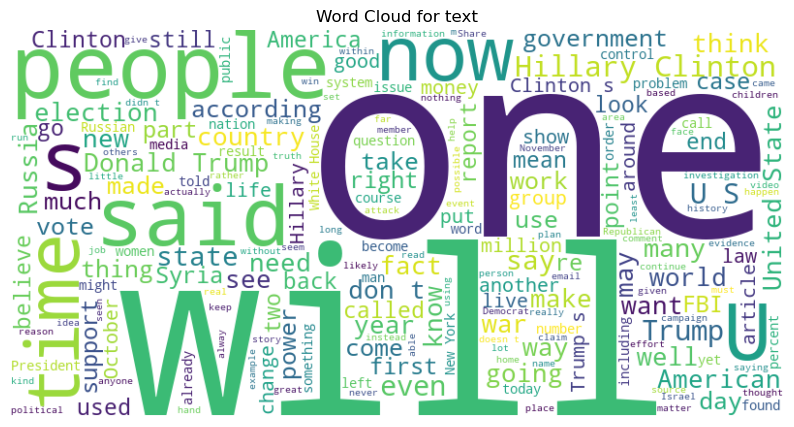

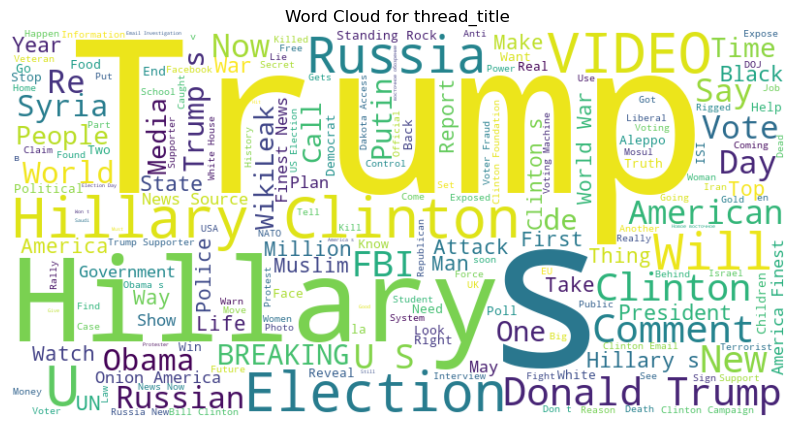

In [9]:
# 6. Top Words in Text Features (Word Cloud)
from wordcloud import WordCloud
text_columns = ['title', 'text', 'thread_title']  # Adjust based on available text columns
for col in text_columns:
    if col in data.columns:
        text_data = " ".join(data[col].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {col}')
        plt.show()




In [11]:
# 7. Spam vs Non-Spam Analysis
if 'news_type' in data.columns:
    plt.figure(figsize=(6, 4))
    data['news_type'].value_counts().plot(kind='bar')
    plt.title('Distribution of News Type (Spam vs Non-Spam)')
    plt.xlabel('News Type')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'], rotation=0)
    plt.show()



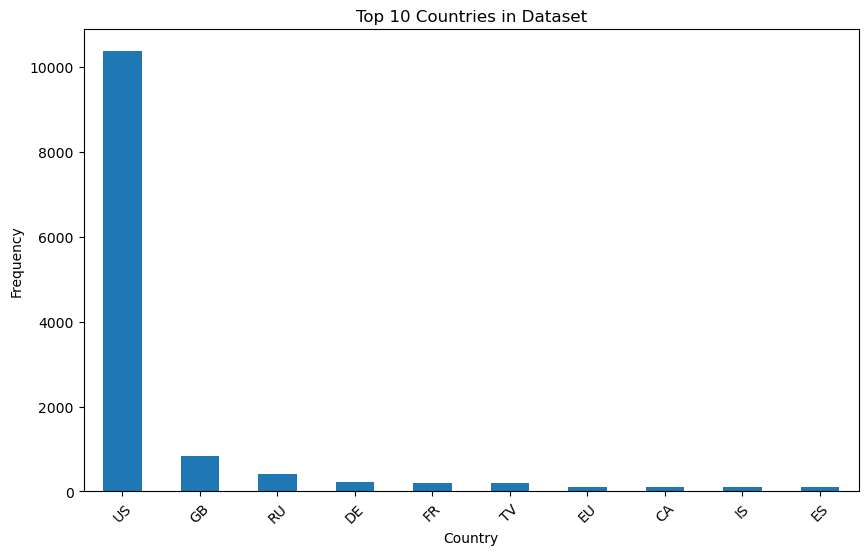

In [12]:
# 8. Country Analysis
if 'country' in data.columns:
    plt.figure(figsize=(10, 6))
    data['country'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Countries in Dataset')
    plt.xlabel('Country')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



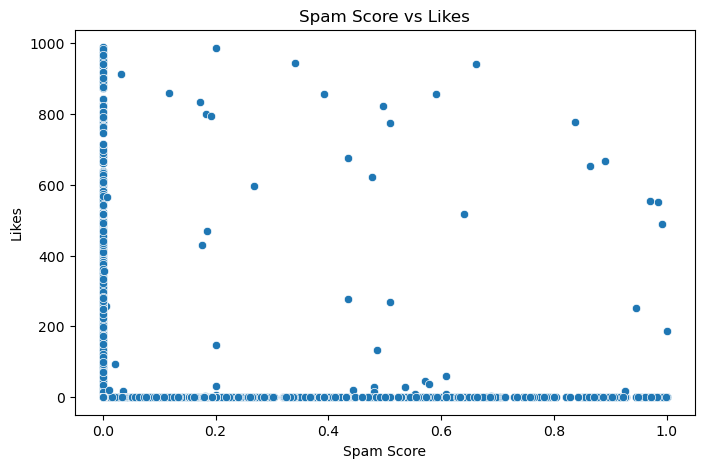

In [13]:
# 9. Relationship Between Features
if 'spam_score' in data.columns and 'likes' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['spam_score'], y=data['likes'])
    plt.title('Spam Score vs Likes')
    plt.xlabel('Spam Score')
    plt.ylabel('Likes')
    plt.show()




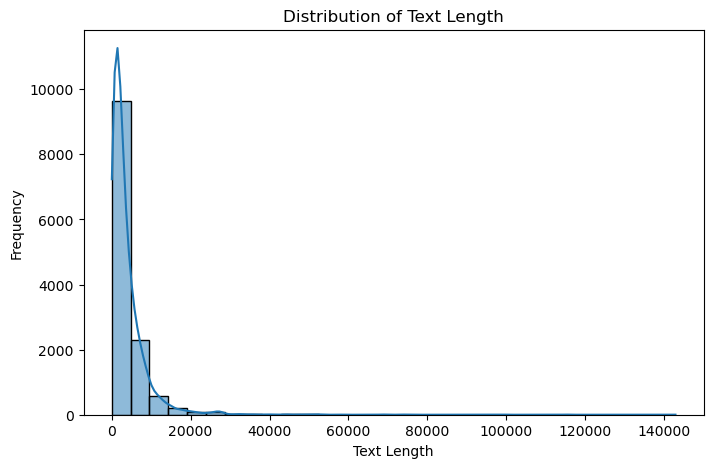

In [14]:
# 10. Text Length Analysis
if 'text' in data.columns:
    data['text_length'] = data['text'].dropna().apply(len)
    plt.figure(figsize=(8, 5))
    sns.histplot(data['text_length'], kde=True, bins=30)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Example: ANOVA for spam_score by news_type
group_0 = data[data['news_type'] == 0]['spam_score']
group_1 = data[data['news_type'] == 1]['spam_score']

# Perform ANOVA
anova_result = f_oneway(group_0, group_1)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("Significant difference found between the groups.")
else:
    print("No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='news_type', y='spam_score', data=data)
plt.title('Spam Score Distribution by News Type')
plt.xlabel('News Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Spam Score')
plt.show()


KeyError: 'news_type'

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from urllib.parse import urlparse
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("fake.csv")
data.isnull().sum()


uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [5]:
data.country.value_counts()



US    10367
GB      831
RU      400
DE      224
FR      207
TV      201
EU      112
CA      103
IS      100
ES      100
NL       55
ME       34
IN       23
BG       19
CO       17
LI       10
IR        7
EE        4
ZA        3
SG        2
IO        1
SE        1
AU        1
CH        1
Name: country, dtype: int64

In [6]:
data.country.fillna("US",inplace=True)
data.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

In [7]:
value_counts=data.language.value_counts()
to_remove=value_counts[value_counts<500].index
data.replace(to_remove,np.nan,inplace=True)

In [8]:
value_counts=data.country.value_counts()
to_remove=value_counts[value_counts<20].index
data.replace(to_remove,np.nan,inplace=True)

In [9]:
columns=['uuid', 'ord_in_thread', 'published','language', 'crawled', 'domain_rank', 'replies_count','participants_count', 'likes', 'comments', 'shares',"main_img_url"]
data.drop(columns,axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sadianasrintisha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data package
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words=stopwords.words("english")
def stemmer(txt):
    #txt=txt.lower()
    words=word_tokenize(txt)
    words=[w for w in words if w.isalpha()]
    words=[w for w in words if not w in stop_words]
    return( " ".join(words ))
data["title"]=data["title"].apply(stemmer)
data["text"]=data["text"].apply(stemmer)
data["thread_title"]=data["thread_title"].apply(stemmer)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadianasrintisha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sadianasrintisha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
tfidf=TfidfVectorizer()


In [14]:
data["title"]=tfidf.fit_transform(data["title"]).toarray()


In [15]:
data["text"]=tfidf.fit_transform(data["text"]).toarray()


In [16]:
data["thread_title"]=tfidf.fit_transform(data["thread_title"]).toarray()


In [17]:
data["author"]=tfidf.fit_transform(data["author"]).toarray()


In [18]:
data["site_url"]=tfidf.fit_transform(data["site_url"]).toarray()


In [19]:
data.head(5)


author  title  text  site_url country  thread_title  spam_score  type
0     0.0    0.0   0.0  0.984487      US           0.0       0.000  bias
1     0.0    0.0   0.0  0.984487      US           0.0       0.000  bias
2     0.0    0.0   0.0  0.984487      US           0.0       0.000  bias
3     0.0    0.0   0.0  0.984487      US           0.0       0.068  bias
4     0.0    0.0   0.0  0.984487      US           0.0       0.865  bias

In [20]:
data["spam_score"]=data["spam_score"]-0.5


In [21]:
news_type=[]
for i in data["spam_score"]:
    if(i<0):
        news_type.append("0")
    else:
        news_type.append("1")
data["news_type"]=news_type

In [22]:
data.drop("spam_score",axis=1,inplace=True)
data.head()

author  title  text  site_url country  thread_title  type news_type
0     0.0    0.0   0.0  0.984487      US           0.0  bias         0
1     0.0    0.0   0.0  0.984487      US           0.0  bias         0
2     0.0    0.0   0.0  0.984487      US           0.0  bias         0
3     0.0    0.0   0.0  0.984487      US           0.0  bias         0
4     0.0    0.0   0.0  0.984487      US           0.0  bias         1

In [23]:
data.type.value_counts()
value_counts=data.type.value_counts()
to_remove=value_counts[value_counts<20].index
data.replace(to_remove,np.nan,inplace=True)

In [24]:
data.isnull().sum()


author           0
title            0
text             0
site_url         0
country          0
thread_title     0
type            19
news_type        0
dtype: int64

In [25]:
data.country.value_counts()


US    8612
GB     546
RU     124
EU     111
TV     101
ES     100
IS      99
DE      62
FR      36
NL      34
ME      34
IN      23
CA       3
Name: country, dtype: int64

In [26]:
data.head(5)


author  title  text  site_url country  thread_title  type news_type
0     0.0    0.0   0.0  0.984487      US           0.0  bias         0
1     0.0    0.0   0.0  0.984487      US           0.0  bias         0
2     0.0    0.0   0.0  0.984487      US           0.0  bias         0
3     0.0    0.0   0.0  0.984487      US           0.0  bias         0
4     0.0    0.0   0.0  0.984487      US           0.0  bias         1

In [27]:
data=pd.get_dummies(data=data,columns=["country","type"])


In [28]:
y=data["news_type"].values
x=data.drop("news_type",axis=1)
x=x.values

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [30]:
LR=LogisticRegression()
model_LR=LR.fit(x_train,y_train)
predict=model_LR.predict(x_test)

In [31]:
LR=LogisticRegression()
model_LR=LR.fit(x_train,y_train)
KNN=KNeighborsClassifier()
model_KNN=KNN.fit(x_train,y_train)
DTC=DecisionTreeClassifier(random_state=0)
model_DTC=DTC.fit(x_train,y_train)
RFC=RandomForestClassifier(random_state=0)
model_RFC=RFC.fit(x_train,y_train)
GBC=GradientBoostingClassifier(random_state=0)
model_GBC=GBC.fit(x_train,y_train)
XGB=XGBClassifier()
model_XGB=XGB.fit(x_train,y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['0' '1']

In [17]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('fake.csv')


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to visualize distributions for each feature
engagement_features = ['replies_count', 'participants_count', 'likes', 'comments', 'shares']

for feature in engagement_features:
    if feature in data.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='news_type', y=feature, data=data)
        plt.title(f'{feature} Distribution by News Type')
        plt.xlabel('News Type (0 = Non-Fake, 1 = Fake)')
        plt.ylabel(feature)
        plt.show()


ValueError: Could not interpret input 'news_type'

<Figure size 800x500 with 0 Axes>

In [19]:
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
import numpy as np

# Load the dataset
data = pd.read_csv('fake.csv')


def update_spam_score(row):
    if row['spam_score'] == 0.0:
        if row['participants_count'] == 0:
            return 0.0
        # Define thresholds for scaling
        max_likes = 988
        max_shares = 988
        max_participants = 240
        max_replies = 309
        max_ord_in_thread = 100
        
        # Normalize features
        likes_factor = 1 - min(row['likes'] / max_likes, 1)
        participants_factor = 1 - min(row['participants_count'] / max_participants, 1)
        replies_factor = 1 - min(row['replies_count'] / max_replies, 1)
        thread_order_factor = 1 - min(row['ord_in_thread'] / max_ord_in_thread, 1)
        shares_factor = 1 - min(row['shares'] /  max_shares, 1)
        
        # Weighted scaling (adjust weights as needed)
        combined_factor = (
            0.1 * likes_factor +
            0.3 * participants_factor +
            0.2 * replies_factor +
            0.2 * thread_order_factor +
            0.2 * shares_factor
        )
        
        # Weighted scaling (adjust weights as needed)
        score = 0.1 + (0.1 * combined_factor)
        return score
    else:
        return row['spam_score']

# Apply the function to update the spam_score
data['updated_spam_score'] = data.apply(update_spam_score, axis=1)

spam_arr = np.array(data['updated_spam_score'])

# Define bins with a range of 0.1 each
bins = np.arange(0, 1.1, 0.01)  # Bin edges from 0 to 1.0 with a step of 0.1

# Bin the values
binned_values = np.digitize(spam_arr, bins, right=False) - 1

# Count the occurrences in each bin
bin_counts = [np.sum(binned_values == i) for i in range(len(bins) - 1)]

# Find the median
median_value = np.median(spam_arr)

news_type=[]
for i in data["updated_spam_score"]:
    if(i<median_value):
        news_type.append(0)
    else: 
        news_type.append(1)
data["news_type"]=news_type

F-statistic: 43.580109852472546, p-value: 4.227618155126551e-11
Significant difference found between the groups.


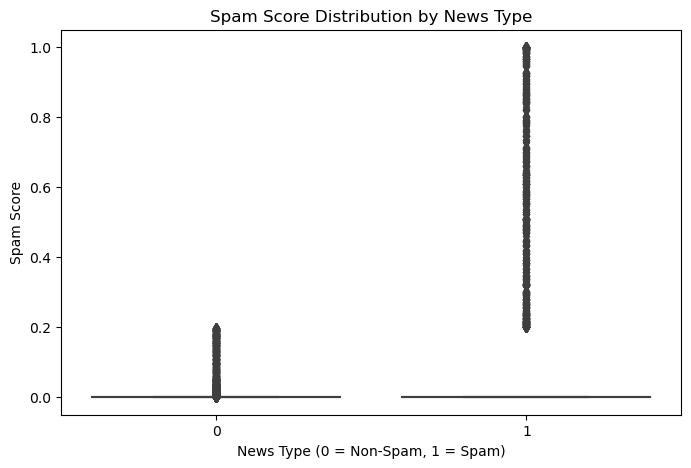

In [20]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Example: ANOVA for spam_score by news_type
group_0 = data[data['news_type'] == 0]['spam_score']
group_1 = data[data['news_type'] == 1]['spam_score']

# Perform ANOVA
anova_result = f_oneway(group_0, group_1)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpret results
if anova_result.pvalue < 0.05:
    print("Significant difference found between the groups.")
else:
    print("No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='news_type', y='spam_score', data=data)
plt.title('Spam Score Distribution by News Type')
plt.xlabel('News Type (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Spam Score')
plt.show()

In [21]:
from scipy.stats import f_oneway

# Ensure 'updated_spam_score' and 'news_type' exist in the dataset
if 'updated_spam_score' in data.columns and 'news_type' in data.columns:
    # Group data by news_type
    spam_score_non_spam = data[data['news_type'] == 0]['updated_spam_score']
    spam_score_spam = data[data['news_type'] == 1]['updated_spam_score']
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(spam_score_non_spam, spam_score_spam)
    
    # Display results
    print(f"ANOVA Results for Updated Spam Score by News Type:")
    print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.05:
        print("The difference in updated spam scores between news types is statistically significant.")
    else:
        print("The difference in updated spam scores between news types is not statistically significant.")
else:
    print("Required columns 'updated_spam_score' or 'news_type' are missing.")


ANOVA Results for Updated Spam Score by News Type:
F-Statistic: 6420.7991, P-Value: 0.0000
The difference in updated spam scores between news types is statistically significant.


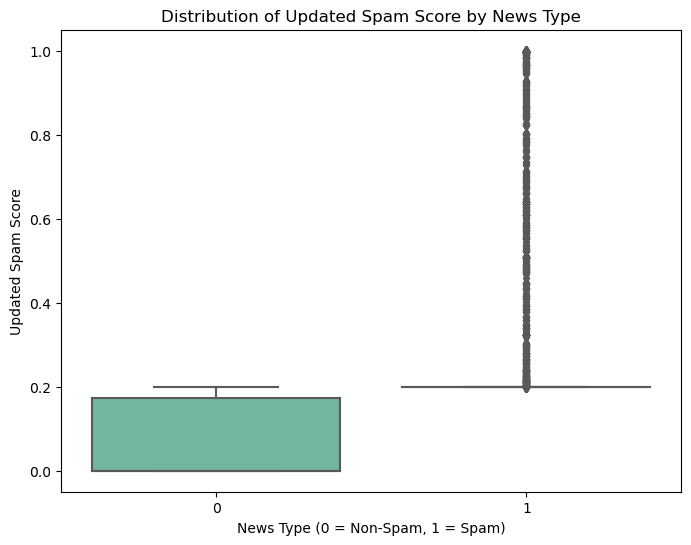

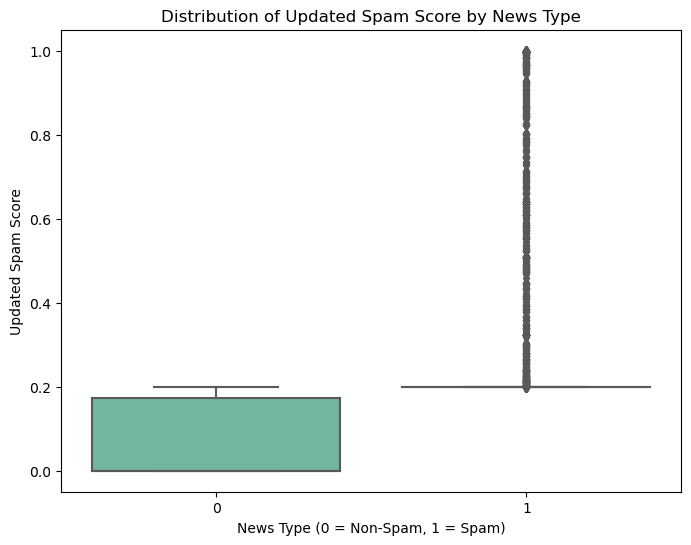

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'updated_spam_score' and 'news_type' exist in the dataset
if 'updated_spam_score' in data.columns and 'news_type' in data.columns:
    # Create a boxplot for visualization
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='news_type', y='updated_spam_score', data=data, palette="Set2")
    plt.title("Distribution of Updated Spam Score by News Type")
    plt.xlabel("News Type (0 = Non-Spam, 1 = Spam)")
    plt.ylabel("Updated Spam Score")
    plt.show()
else:
    print("Required columns 'updated_spam_score' or 'news_type' are missing.")
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='news_type', y='updated_spam_score', data=data, palette="Set2")
plt.title("Distribution of Updated Spam Score by News Type")
plt.xlabel("News Type (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Updated Spam Score")
plt.show()
